**In this notebook we are going to test a combination of multiple optimizers, learning rates and batch sizes**

In [1]:
from matplotlib import pyplot as plt 
import keras
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
# Load CIFAR-10 dataset 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('Training set shape: ', x_train.shape)
print('Testing set shape: ', x_test.shape)

170508288/170498071 [==============================] - 2s 0us/step
Training set shape:  (50000, 32, 32, 3)
Testing set shape:  (10000, 32, 32, 3)


**Define different learning rates, optimizers and batch sizes we want to test:** 

In [3]:
epochs = 20
learning_rates = [1e-1, 1e-2, 1e-3]
optimizers = ['SGD', 'Adam'] #RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
batch_sizes = [32, 64]

**Define our model**

In [4]:
def basic_model():
    x_input = tf.keras.Input([32, 32, 3])
    x = tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same')(x_input)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same')(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(16)(x) # 
    x = tf.keras.layers.Dense(10, activation='softmax')(x)
    model = tf.keras.Model(x_input, x)
    return model

In [5]:
# Lists to store losses, accuracies, etc
infos = []
losses = []
val_losses = []
accuracies = []
val_accuracies = []


for optimizer in optimizers:
  for learning_rate in learning_rates:
    for batch_size in batch_sizes:
      
      info = 'Optmizer ' + optimizer + ' / LearningRate ' + str(learning_rate) + ' / BatchSize: ' + str(batch_size)
      
      model = basic_model()
      model.compile(optimizer=tf.keras.optimizers.__getattribute__(optimizer)(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

      print('[Started...] Training with ' + info)
      history = model.fit(x=x_train, 
                          y=tf.keras.utils.to_categorical(y_train),
                          epochs=epochs,
                          steps_per_epoch=len(x_train)/batch_size, # At each epoch, all models will see the entire dataset
                          verbose=0,
                          validation_data=(x_test, tf.keras.utils.to_categorical(y_test)))
      
      print('[Finished]')
      
      infos.append(info)
      losses.append(history.history['loss'])
      val_losses.append(history.history['val_loss'])
      accuracies.append(history.history['accuracy'])
      val_accuracies.append(history.history['val_accuracy'])

[Started...] Training with Optmizer SGD / LearningRate 0.1 / BatchSize: 32
[Finished]
[Started...] Training with Optmizer SGD / LearningRate 0.1 / BatchSize: 64
[Finished]
[Started...] Training with Optmizer SGD / LearningRate 0.01 / BatchSize: 32
[Finished]
[Started...] Training with Optmizer SGD / LearningRate 0.01 / BatchSize: 64
[Finished]
[Started...] Training with Optmizer SGD / LearningRate 0.001 / BatchSize: 32
[Finished]
[Started...] Training with Optmizer SGD / LearningRate 0.001 / BatchSize: 64
[Finished]
[Started...] Training with Optmizer Adam / LearningRate 0.1 / BatchSize: 32
[Finished]
[Started...] Training with Optmizer Adam / LearningRate 0.1 / BatchSize: 64
[Finished]
[Started...] Training with Optmizer Adam / LearningRate 0.01 / BatchSize: 32
[Finished]
[Started...] Training with Optmizer Adam / LearningRate 0.01 / BatchSize: 64
[Finished]
[Started...] Training with Optmizer Adam / LearningRate 0.001 / BatchSize: 32
[Finished]
[Started...] Training with Optmizer Ada

**Plot every loss, validation loss, accuracy and validation accuracy**

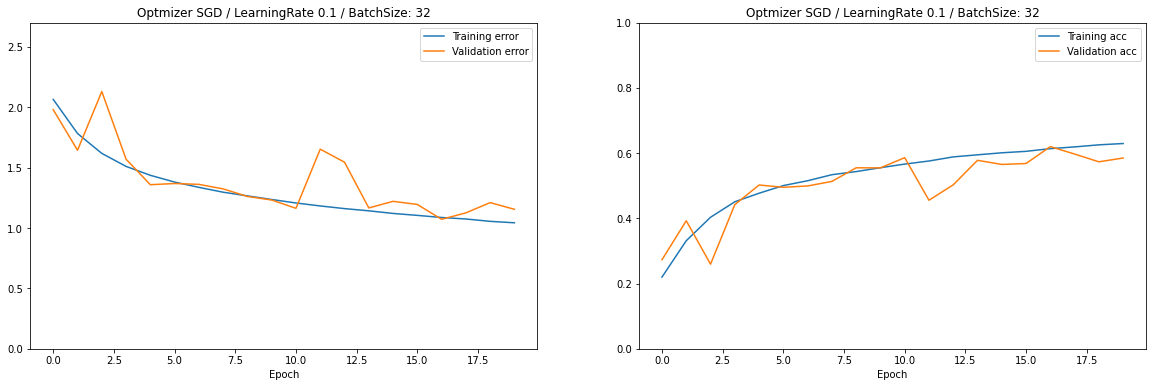

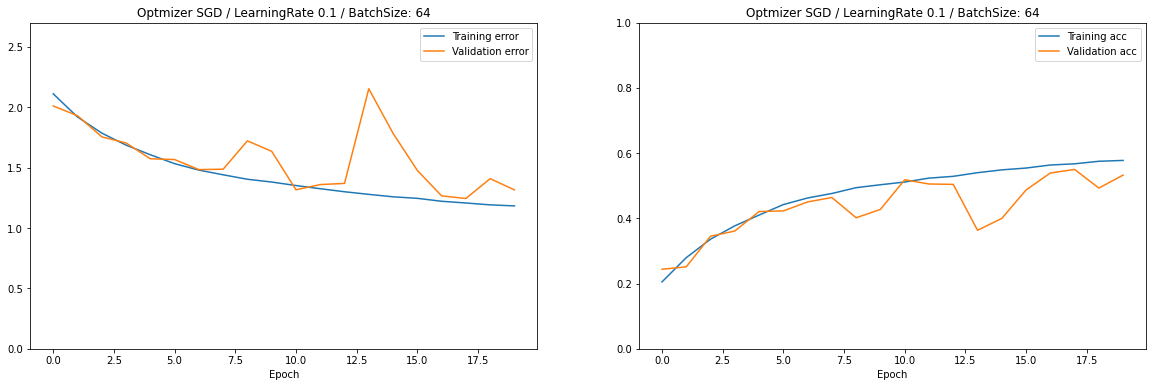

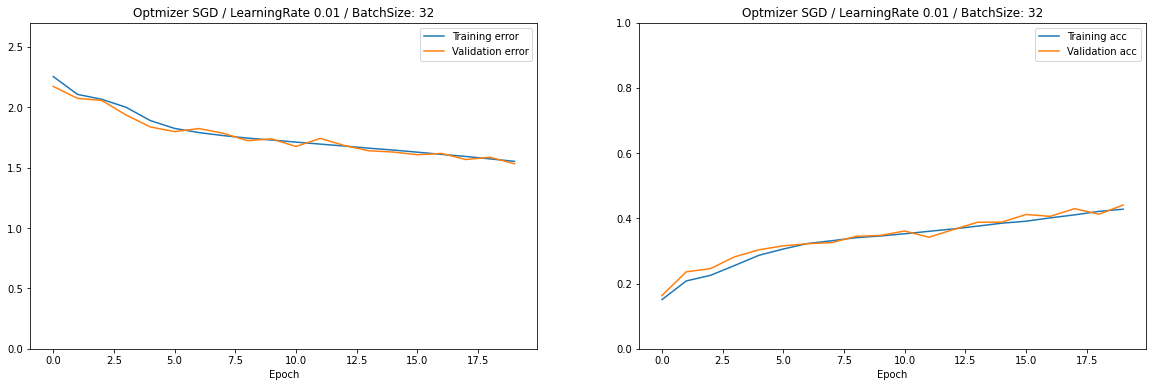

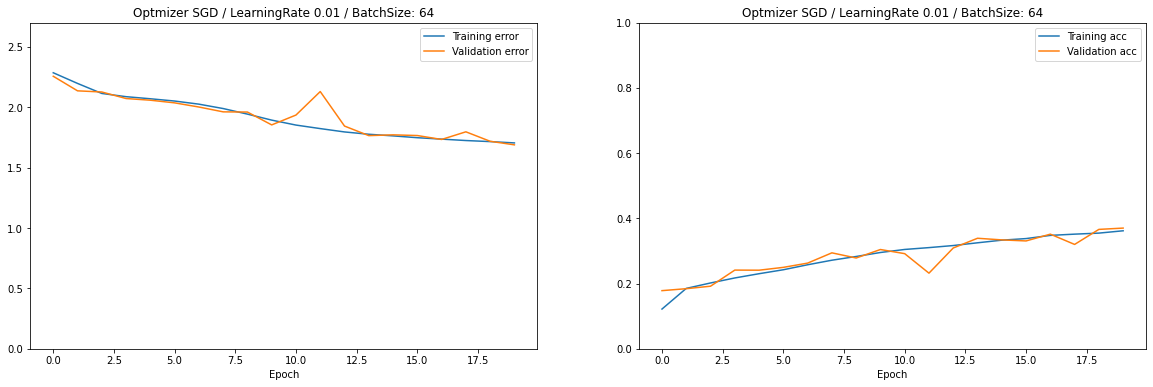

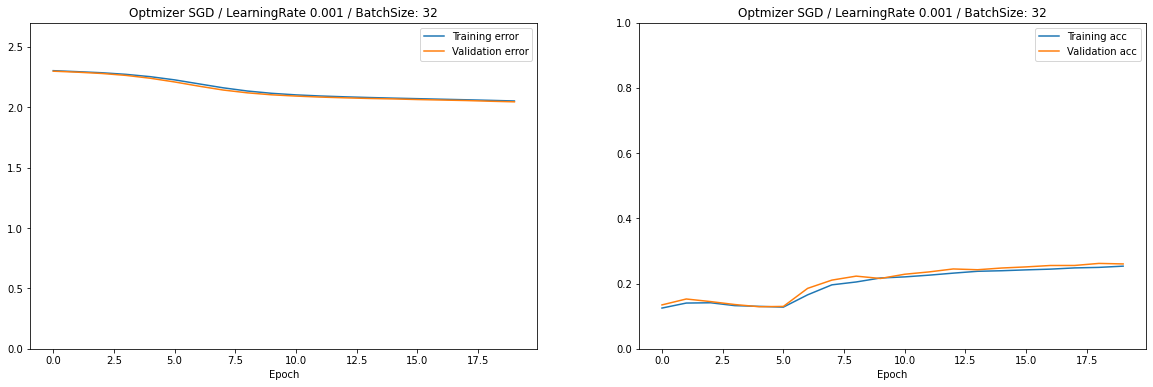

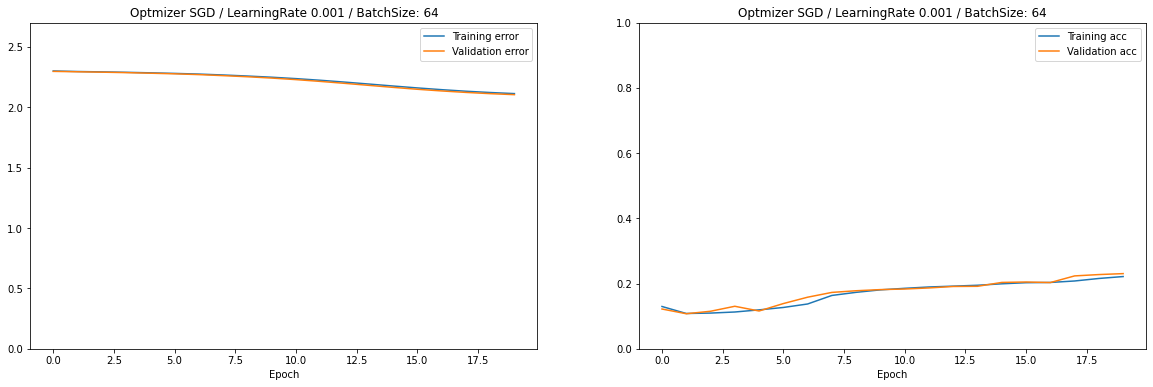

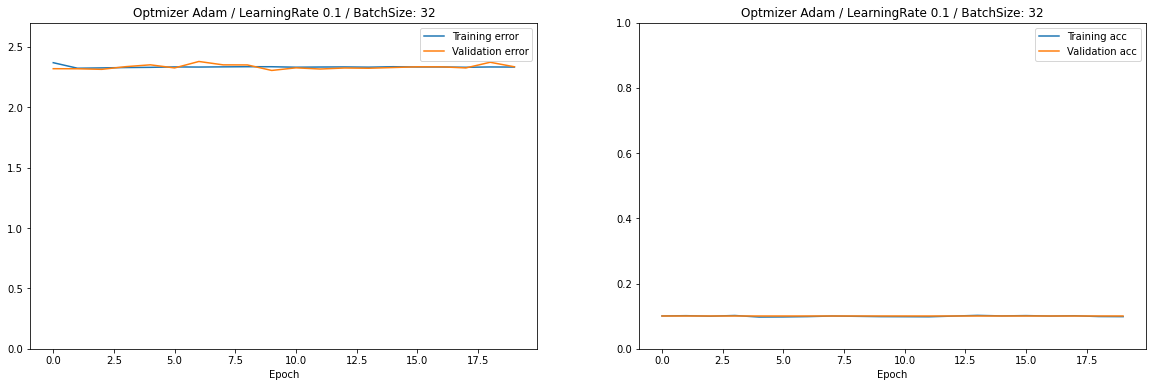

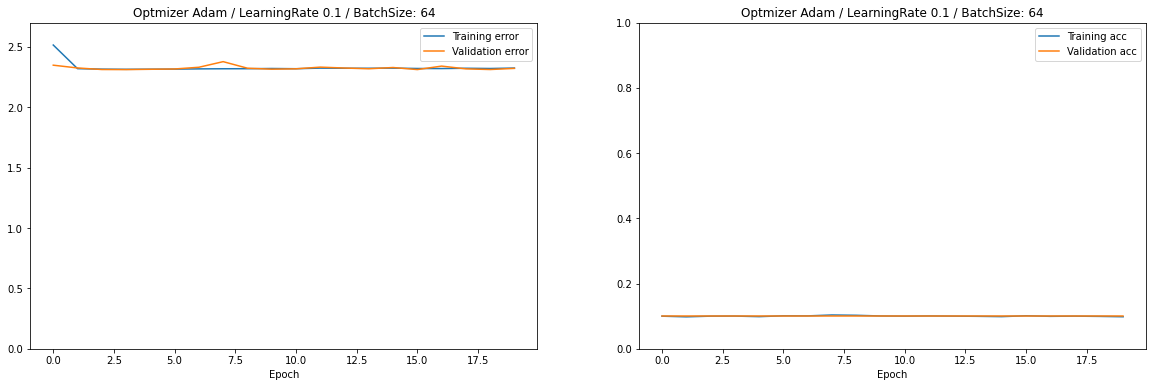

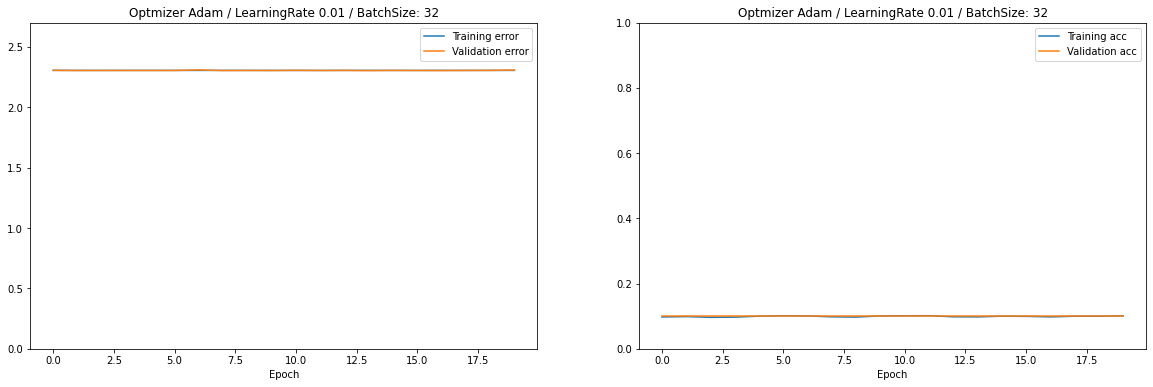

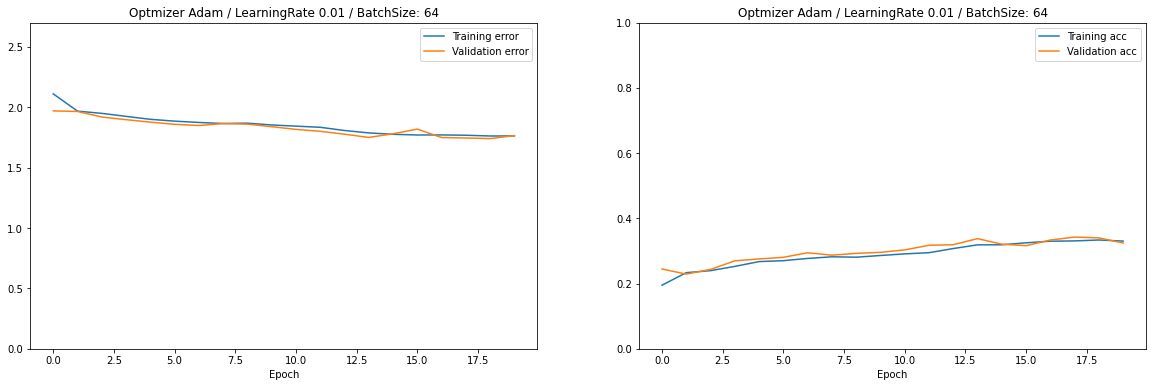

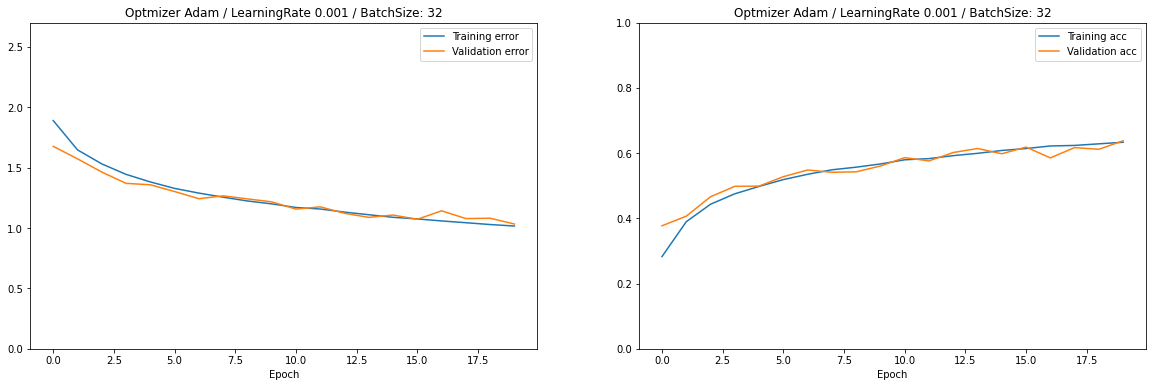

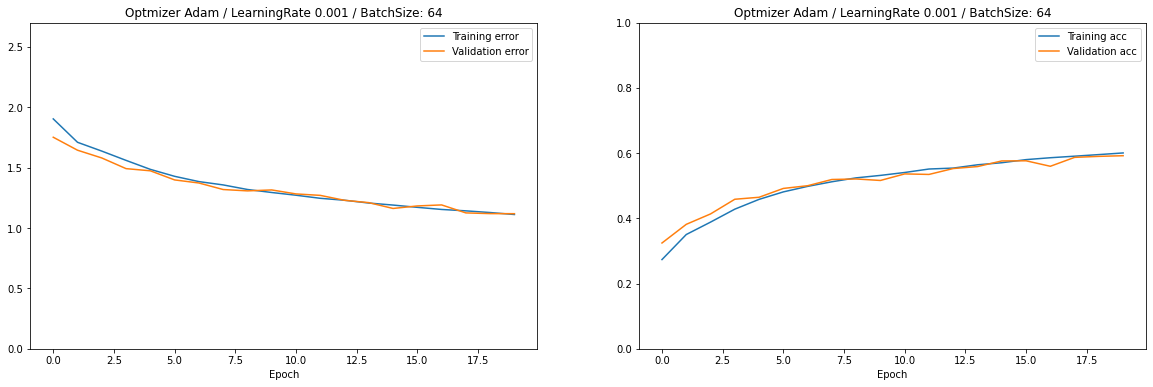

In [9]:
for i in range(len(infos)):

  plt.figure(figsize=(20,6))
  plt.subplot(1,2,1) #
  plt.title(infos[i])
  plt.plot(losses[i])
  plt.plot(val_losses[i])
  plt.xlabel('Epoch')
  plt.legend(['Training error', 'Validation error'], loc='upper right')
  plt.ylim([0, 2.7])
  

  plt.subplot(1,2,2) 
  plt.title(infos[i])
  plt.plot(accuracies[i])
  plt.plot(val_accuracies[i])
  plt.xlabel('Epoch')
  plt.legend(['Training acc', 'Validation acc'], loc='upper right')
  plt.ylim([0, 1.0])
  plt.show()    